#**Hand Gesture Recognition**

In [ ]:
# Here we import everything we need for the project

%matplotlib inline
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)

2.2.0


In [ ]:
!wget "https://storage.googleapis.com/kaggle-data-sets/39466%2F61155%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593658503&Signature=XjlX%2BiLaGG2aOqTr9eaYbUT2EAuHWmkzILsJjdgBgaLjtRwLgtMN3jx1a9AG5wZAE%2BrJ83X%2F2j0GFJd%2BQ%2B5Vpk%2BCA0Gzq8gnuAzThlKlpSiBhknvb1wq%2FI3jUsn3QaN7cdPEvQk28nQXy8vFWbYKPPObhSC0%2BOoNt1HtKpnr6dgDQRwxdEcKxNPdvlW96NHAiNd%2BmA2TzB8pIo%2F8u5hJ35ebkBA8nyFN1w5PMTCq00w0VqsL3h5lyUUWSYf1P%2FT4bJGteim6MabnYP9iuCND3w3DdCDO6%2B6kP%2FE7mtgTCPmtk5g9WCUNjKU93Argbd03zaGnuIw0NEO1tzZF3ngK6g%3D%3D"

The name is too long, 488 chars total.
Trying to shorten...
New name is 39466%2F61155%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593658503&Signature=XjlX+iLaGG2aOqTr9eaYbUT2EAuHWmkzILsJjdgBgaLjtRwLgtMN3jx1a9AG5wZAE+rJ83X%2F2j0GFJd+Q+5Vpk+CA0Gzq8gnuAzT.
--2020-06-29 03:01:18--  https://storage.googleapis.com/kaggle-data-sets/39466%2F61155%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1593658503&Signature=XjlX%2BiLaGG2aOqTr9eaYbUT2EAuHWmkzILsJjdgBgaLjtRwLgtMN3jx1a9AG5wZAE%2BrJ83X%2F2j0GFJd%2BQ%2B5Vpk%2BCA0Gzq8gnuAzThlKlpSiBhknvb1wq%2FI3jUsn3QaN7cdPEvQk28nQXy8vFWbYKPPObhSC0%2BOoNt1HtKpnr6dgDQRwxdEcKxNPdvlW96NHAiNd%2BmA2TzB8pIo%2F8u5hJ35ebkBA8nyFN1w5PMTCq00w0VqsL3h5lyUUWSYf1P%2FT4bJGteim6MabnYP9iuCND3w3DdCDO6%2B6kP%2FE7mtgTCPmtk5g9WCUNjKU93Argbd03zaGnuIw0NEO1tzZF3ngK6g%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.125.128

In [ ]:
# Unzip images, ignore this cell if files are already in the workspace
!unzip /content/gestures.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0013.png  
  inflating: leapgestrecog/leapGestRe

In [ ]:
# We need to get all the paths for the images to later load them
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk("/content/leapGestRecog", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): # We want only the images
      imagepaths.append(path)

print(len(imagepaths)) # If > 0, then a PNG image was loaded

20000


In [ ]:
# This function is used more for debugging and showing results later. It plots the image into the notebook
def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(240, 640)


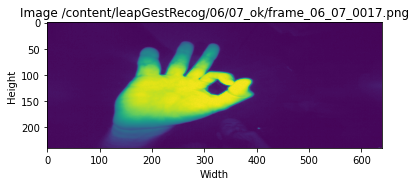

In [ ]:
plot_image(imagepaths[0]) #We plot the first image from our imagepaths array

In [ ]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  X.append(img)
  
  # Processing label in image path
  category = path.split("/")[3]
  label = int(category.split("_")[0][1]) # We need to convert 10_down to 00_down, or else it crashes
  y.append(label)

# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120, 320, 1) # Needed to reshape so CNN knows it's different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Images loaded:  20000
Labels loaded:  20000
6 /content/leapGestRecog/06/07_ok/frame_06_07_0017.png


In [ ]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [ ]:
# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [ ]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

In [ ]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Train on 14000 samples, validate on 6000 samples
Epoch 1/5


In [ ]:
# Save entire model to a HDF5 file
model.save('handrecognition_model.h5')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

In [ ]:
predictions = model.predict(X_test) # Make predictions towards the test set

In [ ]:
np.argmax(predictions[0]), y_test[0] # If same, got it right

In [ ]:
# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

In [ ]:
validate_9_images(predictions, y_test, X_test)

In [ ]:
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number

In [ ]:
# H = Horizontal
# V = Vertical

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])